<a href="https://colab.research.google.com/github/CGuzman99/Data-analysis-and-ML/blob/main/CNN_MNIST/CNN_MNIST_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Summary

Machine learning model for multicass classification problem. The goal is to classify handwritten digits into 10 categories (0-9) using a 2D convolutional neural network.

#Introduction

Convolutional networks learn local, tranlation-invariant features, that's why they are highly data efficient on perceptual problems. This means a convnet is a good way to approach an image classification problem.

In this project I'm building a model that classifies handwritten digits from the MNIST digits dataset. The dataset is divided into 60000 images for training and 10000 for testing, each one with shape (28, 28, 1), i.e., grayscale images of 28×28 pixels. These images shall be classified into 10 categories, which are 0 to 9.

#Methodology

The data is going to be downloaded from mnist dataset included in the Keras library. To build the model, I'm using Keras and Matplotlib to plot the results.

In [1]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import layers
from keras import models
import matplotlib.pyplot as plt

In [2]:
# Downloading the data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
# Vectorization of the train and test sets
train_images = train_images.reshape((60000, 28, 28,1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

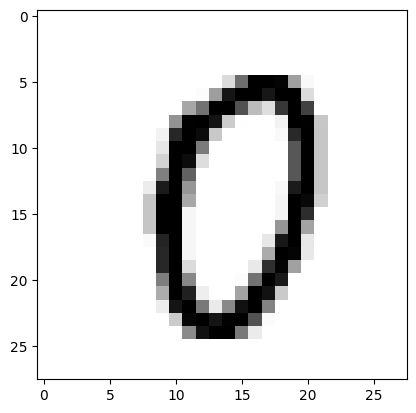

In [4]:
# Data sample
digit = train_images[1000]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [5]:
# Creating a partial training set and a validation set from the train set
x_val = train_images[:10000]
partial_x_train = train_images[10000:]
y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

The model is mainly formed by convolutinal layers, before passing to a flattening layer and a densely connected layers. In the final layer I use the softmax activation to output the probability of an element of the data to be part of one of the 10 possible classes (or categories). Next, a table with the structure of the model is shown.

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [7]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/20
782/782 [==============================] - 44s 55ms/step - loss: 0.1953 - accuracy: 0.9364 - val_loss: 0.1539 - val_accuracy: 0.9532
Epoch 2/20
782/782 [==============================] - 47s 60ms/step - loss: 0.0523 - accuracy: 0.9835 - val_loss: 0.0513 - val_accuracy: 0.9838
Epoch 3/20
782/782 [==============================] - 43s 55ms/step - loss: 0.0352 - accuracy: 0.9890 - val_loss: 0.0495 - val_accuracy: 0.9846
Epoch 4/20
782/782 [==============================] - 42s 54ms/step - loss: 0.0277 - accuracy: 0.9915 - val_loss: 0.0321 - val_accuracy: 0.9908
Epoch 5/20
782/782 [==============================] - 42s 54ms/step - loss: 0.0209 - accuracy: 0.9931 - val_loss: 0.0447 - val_accuracy: 0.9886
Epoch 6/20
782/782 [==============================] - 45s 58ms/step - loss: 0.0175 - accuracy: 0.9944 - val_loss: 0.0385 - val_accuracy: 0.9914
Epoch 7/20
782/782 [==============================] - 42s 54ms/step - loss: 0.0129 - accuracy: 0.9960 - val_loss: 0.0482 - val_accuracy:

#Results

As we can see on the next plots, the model has a peak at 4 epochs and then starts to overfit the data.

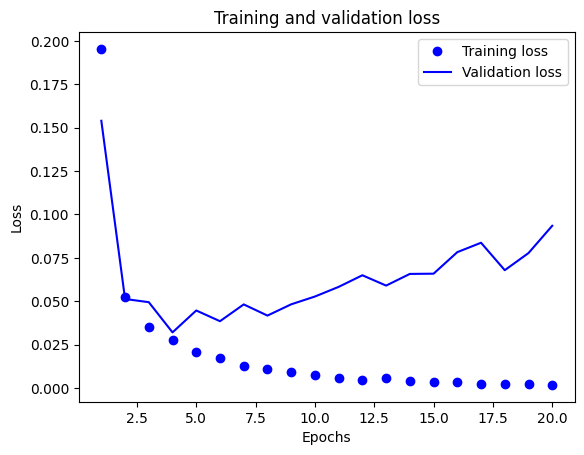

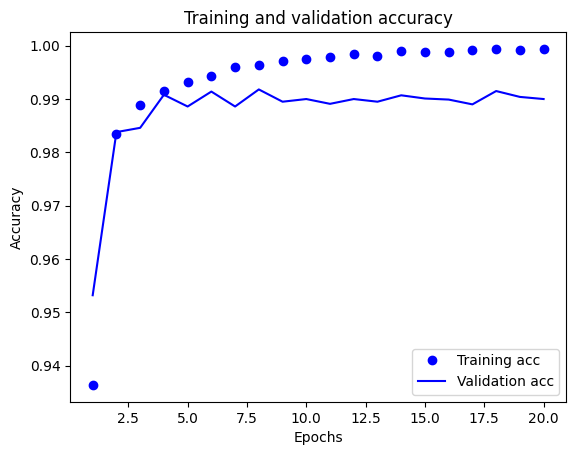

In [8]:
# Plotting the training and validation loss

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure()

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Now, we can build a new model from scratch and, to avoid overfitting, we can train it for 4 epochs using the whole training set of the dataset.

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )
model.fit(train_images, train_labels, epochs=4, batch_size=64)

Epoch 1/4
938/938 [==============================] - 49s 52ms/step - loss: 0.1755 - accuracy: 0.9460
Epoch 2/4
938/938 [==============================] - 48s 52ms/step - loss: 0.0468 - accuracy: 0.9857
Epoch 3/4
938/938 [==============================] - 47s 50ms/step - loss: 0.0321 - accuracy: 0.9900
Epoch 4/4
938/938 [==============================] - 48s 51ms/step - loss: 0.0238 - accuracy: 0.9930


The result is a model with a 99% accuracy rate.

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Loss: ', test_loss)
print('Accuracy: ', test_acc)

313/313 [==============================] - 3s 9ms/step - loss: 0.0287 - accuracy: 0.9914
Loss:  0.028726505115628242
Accuracy:  0.9914000034332275


In [11]:
prediction = model.predict(test_images)

313/313 [==============================] - 3s 8ms/step


Here, we can see an example of the predictions from the test set. First is the image of the sample, which we can clearly identify as the number zero. The softmax activation of the last layer outputs a 10D vector with the problability of an element to be part of each category. The plot below shows the probability of the image to be part of each category. It shows that the model correctly classifies it as part of the category 0, which corresponds to the digit 0.

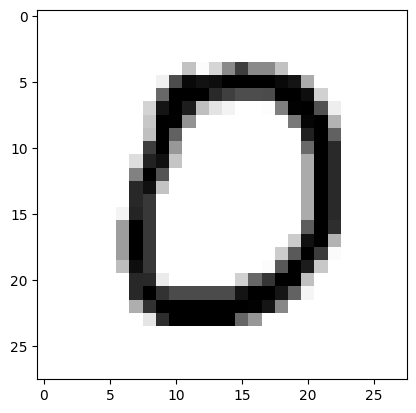

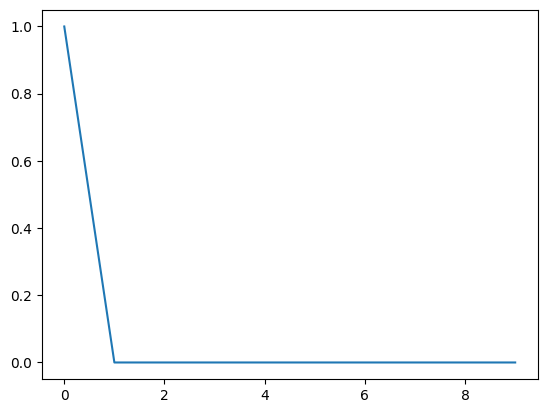

In [12]:
sample = 10

plt.imshow(test_images[sample], cmap=plt.cm.binary)
plt.figure()
plt.plot(prediction[sample])

plt.show()

#Conclusions

A Convolutional Neural Network that classifies handwritten digits from the MNIST dataset into one of 10 categories was succesfully created, with an accurary of the 99%. To avoid overfitting, a new model was trained for just 4 epochs. Finally, I showed an example of the prediction for one element of the dataset, and how the model did well classifying it.

In conclusion, we can see that a convolutional network is a pretty good approach for multiclass image classification problems. Specifically for this problem it performed really well.